In [19]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [20]:
# Reading data
credit_df = pd.read_csv("copy.csv")

In [21]:
# Converting date to DateTime
credit_df['Pstng Date'] = pd.to_datetime(credit_df['Pstng Date'])

In [22]:
# Storing column names
cols = credit_df.columns

In [23]:
# making train and test data

year = credit_df['Pstng Date'].dt.year.values
idx_train = [i for i in range(len(year)) if year[i]<=2018]
idx_test = [i for i in range(len(year)) if year[i]>=2018]

In [24]:
train_data = credit_df.iloc[idx_train]
test_data = credit_df.iloc[idx_test]

In [25]:
train_data.tail()

,Pstng Date,Year,Doc. Date,Concat,Material,Qty in UnE,Amount in LC,SLoc,Plnt,Vendor,MatYr,PO,City,Account Group,Location,Dependent
102885,2018-08-31,2018,25.08.2018,1.000000e+14,100348501,50,"7,410.50",P01,1020,100517,2018,2600009117,Coimbatore,B001,Domestic,1
102886,2018-07-12,2018,11.07.2018,1.080000e+14,108054411,30,"2,362.44",V01,1020,180177,2018,2620000959,CHENNAI,B010,Domestic,1
102887,2018-07-18,2018,17.07.2018,1.010000e+14,100753440,2,"2,323.60",D01,1020,180113,2018,2620000870,Chennai,B010,Domestic,1
102888,2018-10-24,2018,22.10.2018,1.010000e+14,100870160,50,"1,453.50",A01,1020,100475,2018,2600007765,CHENNAI,B001,Domestic,1
102889,2018-08-24,2018,06.08.2018,1.000000e+14,100345681,100,"8,101.00",P01,1020,100560,2018,2600007846,Coimbatore,B001,Domestic,1


In [26]:
#Preprocessing the data before prediction

def preprocess(data):
    data = pd.DataFrame(data,columns = cols)
    for feature in data.columns: 
        if data[feature].dtype == 'object': 
            data[feature] = pd.Categorical(data[feature]).codes


    data = data.drop("Pstng Date" , axis=1)
    data = data.drop("Doc. Date" , axis=1)
    data = data.drop("Year" , axis=1)
    data = data.drop("PO" , axis=1)
    data = data.drop("Vendor" , axis=1)
    data = data.drop("MatYr" , axis=1)
    labels = data.Dependent
    data.drop('Dependent',axis=1,inplace=True)
    return data,labels

In [27]:
#preprocessing train data
train_data,labels = preprocess(train_data)
test_data,test_labels = preprocess(test_data)

In [28]:
train_data.head()

,Concat,Material,Qty in UnE,Amount in LC,SLoc,Plnt,City,Account Group,Location
0,1.000000e+14,100136950,444,23968,3,1020,5,0,0
1,1.010000e+14,100632311,378,11590,13,1020,5,0,0
2,1.000000e+14,100279631,262,21114,0,1020,17,0,0
3,1.000000e+14,100277120,381,34805,0,1020,3,0,0
4,1.010000e+14,100630122,379,4687,9,1020,6,0,0


In [29]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [30]:
dt_model.fit(train_data, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('d:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(train_data), class_names = list(train_char_label))

Credit_Tree_File.close()


In [32]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_data.columns))


                      Imp
Concat           0.029830
Material         0.180808
    Qty in UnE   0.176513
   Amount in LC  0.433331
SLoc             0.024154
Plnt             0.006240
City             0.099717
Account Group    0.049400
Location         0.000006


In [33]:
y_predict = dt_model.predict(test_data)

#                                      Regularising the Decision Tree

In [36]:

reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 10,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(train_data, labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [37]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(train_data), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = train_data.columns))


                      Imp
Concat           0.029830
Material         0.180808
    Qty in UnE   0.176513
   Amount in LC  0.433331
SLoc             0.024154
Plnt             0.006240
City             0.099717
Account Group    0.049400
Location         0.000006


In [39]:
ytrain_predict = reg_dt_model.predict(train_data)
ytest_predict = reg_dt_model.predict(test_data)

In [40]:
ytrain_predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [41]:
import matplotlib.pyplot as plt

AUC: 0.853


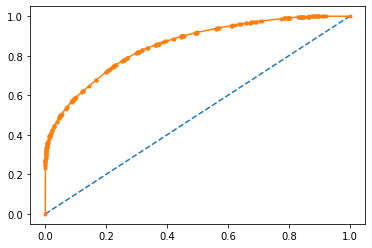

In [44]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(train_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.549


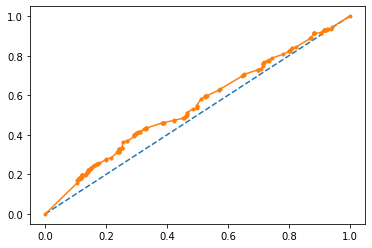

In [45]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(test_data)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.67      0.69     39473
           1       0.80      0.84      0.82     63417

    accuracy                           0.77    102890
   macro avg       0.76      0.75      0.76    102890
weighted avg       0.77      0.77      0.77    102890



In [49]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.35      0.55      0.42     21626
           1       0.68      0.48      0.57     43376

    accuracy                           0.51     65002
   macro avg       0.51      0.52      0.49     65002
weighted avg       0.57      0.51      0.52     65002



In [51]:
confusion_matrix(labels, ytrain_predict)

array([[26294, 13179],
       [10241, 53176]], dtype=int64)

In [52]:
confusion_matrix(test_labels, ytest_predict)

array([[11814,  9812],
       [22362, 21014]], dtype=int64)

In [55]:
reg_dt_model.score(train_data,labels)

0.7723782680532608

In [56]:
reg_dt_model.score(test_data,test_labels)

0.5050306144426325

In [58]:
ytrain_predict = pd.DataFrame(ytrain_predict,columns=['Predicted_labels'])
ytrain_predict['True_Labels'] = labels.values

In [59]:
ytrain_predict.to_excel('train_prdicted.xlsx',index=None)

In [60]:
ytest_predict = pd.DataFrame(ytest_predict,columns=['Predicted_labels'])
ytest_predict['True_Labels'] = test_labels.values

In [61]:
ytest_predict.to_excel('test_prdicted.xlsx',index=None)

In [63]:
import statsmodels.api as sm

res = sm.Logit(labels, train_data).fit()

#odds ratio for training data using logistic regression
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.656413
         Iterations 6
                       5%       95%  Odds Ratio
Concat           1.000000  1.000000    1.000000
Material         1.000000  1.000000    1.000000
    Qty in UnE   0.999691  0.999792    0.999742
   Amount in LC  1.000000  1.000003    1.000001
SLoc             1.013466  1.019447    1.016452
Plnt             1.001619  1.002870    1.002244
City             1.061721  1.070430    1.066067
Account Group    1.107832  1.131692    1.119699
Location         0.308950  0.784767    0.492396
